<a href="https://colab.research.google.com/github/gopalm-ai/Hackathon2022/blob/main/Risk_Analysis_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sensitivity Risk Analysis - Hackathon Project

In [4]:
!pip3 install qiskit
!pip3 install dimod
!pip3 install greedy
!pip3 install numpy
!pip3 install pylatexenc
#!pip3 install qiskit_textbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!git clone https://github.com/JoSQUANTUM/pygrnd.git
#!pip3 install pygrnd

fatal: destination path 'pygrnd' already exists and is not an empty directory.


In [6]:
!pip3 install pygrnd/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./pygrnd
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for pygrnd: filename=pygrnd-0.1.0-py3-none-any.whl size=37571 sha256=c37310586bd901155b741dd33c1019f0310b8f505152d343a72ff45f8e855c17
  Stored in directory: /tmp/pip-ephem-wheel-cache-rqaaabwp/wheels/c6/b7/c0/b186dda1ea5b65ef883a645b27ad64a14b7eb0f729a6d523e8
Successfully built pygrnd
  Attempting uninstall: pygrnd
    Found existing installation: pygrnd 0.1.0
    Uninstalling pygrnd-0.1.0:
      Successfully uninstalled pygrnd-0.1.0


In [7]:
from pygrnd.qc.helper import *
from pygrnd.qc.brm import *
from pygrnd.qc.brm_oracle import *
from pygrnd.qc.QAE import *

from qiskit import execute
from qiskit import Aer

from math import pi
import math
import cmath
import random
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from scipy.stats import norm
import networkx as nx
from IPython.display import Image

## Small Example

In [ ]:
## small example

nodes=['0','1'] # risk items defition
edges=[('0','1'),('1','0')] # correlations

probsNodes={'0':0.4,'1':0.6} # intrinsic probs
probsEdges={('0','1'):0.3, ('1','0'):0.7} # transition probs

print("Number of risk items = ",len(nodes))
print("Number of correlations = ",len(edges))

Number of risk items =  2
Number of correlations =  2


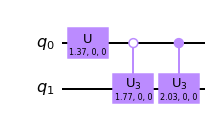

In [ ]:
rm, mat = brm(nodes, edges, probsNodes, probsEdges, model2gate=False) 
rm.draw(output='mpl')

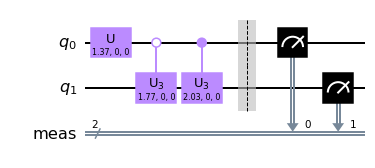

-------------------------------


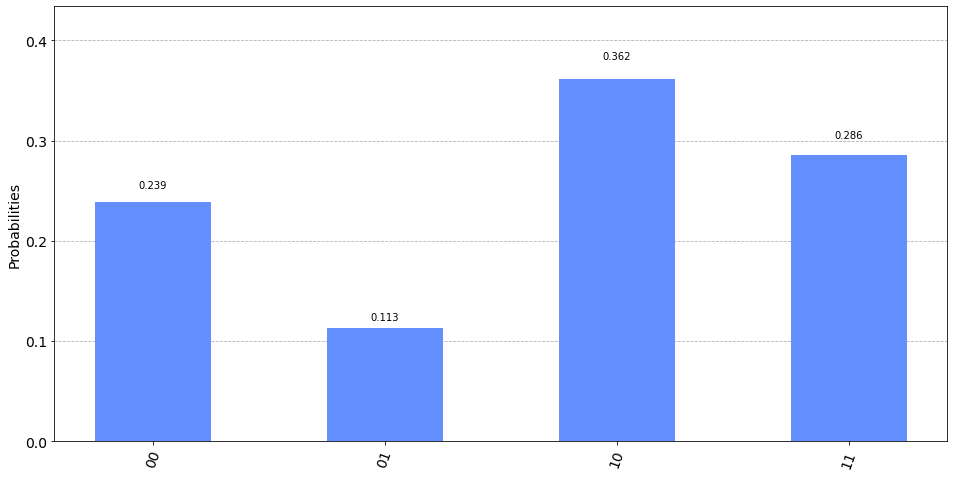

In [ ]:
# execute function to build a qiskit gate with the risk model
#rm, mat = brm(nodes, edges, probsNodes, probsEdges, model2gate=False) 

rm.measure_all()
display(rm.draw(output='mpl'))
print("-------------------------------")

backend = Aer.get_backend('qasm_simulator')
job = execute(rm, backend,shots=100000)
result=job.result()
counts=job.result().get_counts()
plot_histogram(counts,figsize=(16,8))

In [ ]:
## evaluate classically
modelProbabilities(nodes,edges,probsNodes,probsEdges)

([1, 1, 1, 1], 4)

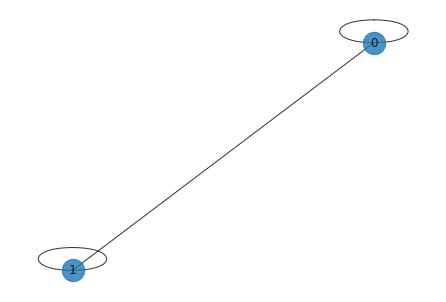

In [ ]:
## building the graph from adjacency matrix for visual representation
G = nx.Graph()
G = nx.from_numpy_array(mat)
nx.draw(G, with_labels=True, alpha=0.8, node_size=500)

In [ ]:
## use Oracle to build QAE and evaluate probabaility for state 'STATELIST'
name="test"
STATELIST=["11"] # we search for the joint probability where both parameters are triggered
Nshots=1000 # number of shots
QAEqubits=4 # QAE bit precision --> 8 bit strings at the end of the measurement to differentiate 2^8 = 265 bins


#rm = BRMlist(RIlist,TPlist,model2gate=True)
rm, mat = brm(nodes, edges, probsNodes, probsEdges, model2gate=True) 
ora = brmoracle("ora",rm,len(nodes),0,STATELIST)
QAE=qae(QAEqubits,len(nodes),len(nodes),rm,ora)


In [ ]:
## execution with local quantum simulator (qasm simulator)

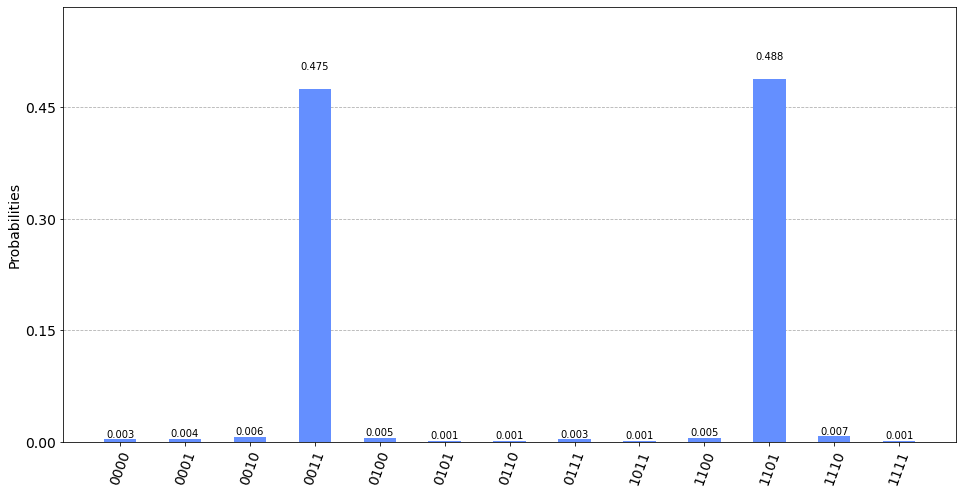

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(QAE, backend,shots=Nshots)
result=job.result()
counts=job.result().get_counts()
plot_histogram(counts,figsize=(16,8))

## Larger Example

In [ ]:
## large example

nodes=['0','1','2','3','4','5'] # risk items defition
edges=[('0','1'),('0','2'),('1','2'),('1','3'),('1','4'),('2','3'),('2','4'),('2','5'),('3','4'),('3','5'),('4','5'),('5','1')] # risk items correlations

probsNodes={'0':0.1,'1':0.2,'2':0.2,'3':0.3,'4':0.1,'5':0.1} # intrinsic probs
probsEdges={('0','1'):0.2, ('0','2'):0.3, ('1','2'):0.2, ('1','3'):0.3, ('1','4'):0.2, ('2','3'):0.3, 
            ('2','4'):0.2, ('2','5'):0.3, ('3','4'):0.2, ('3','5'):0.5, ('4','5'):0.4, ('5','1'):0.4} # transition probs

print("Number of risk items = ", len(nodes))
print("Number of correlations = ", len(edges))

Number of risk items =  6
Number of correlations =  12


NOTE: Item 2 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
NOTE: Item 3 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
NOTE: Item 4 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
NOTE: Item 5 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:


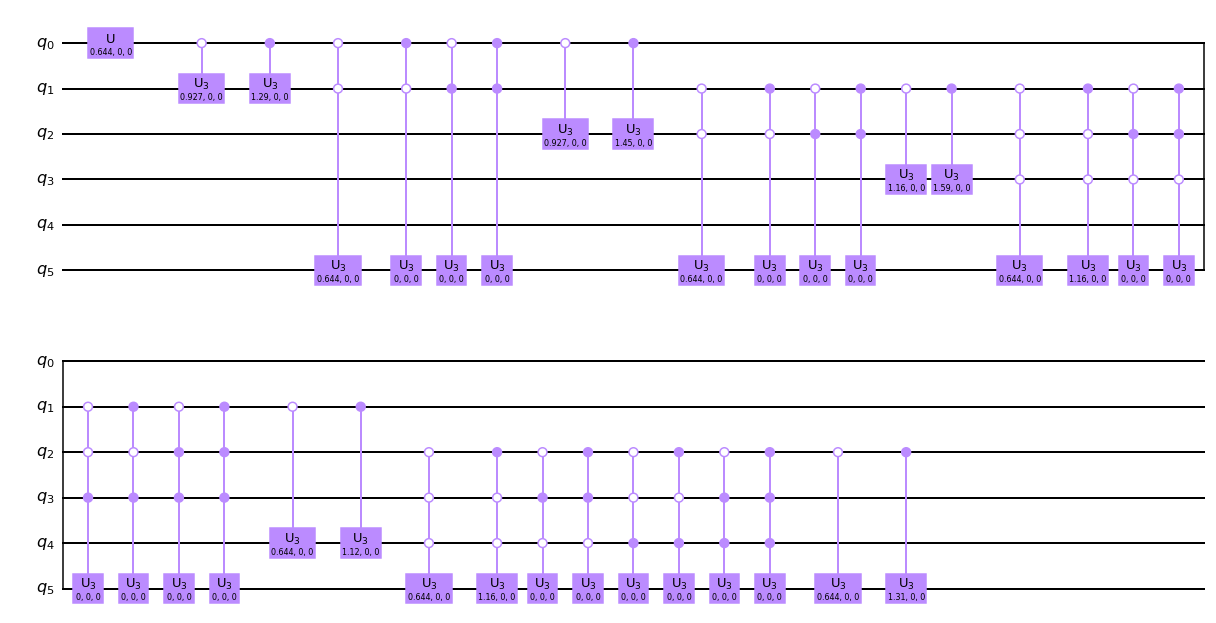

In [ ]:
rm, mat = brm(nodes, edges, probsNodes, probsEdges, model2gate=False) 
rm.draw(output='mpl')

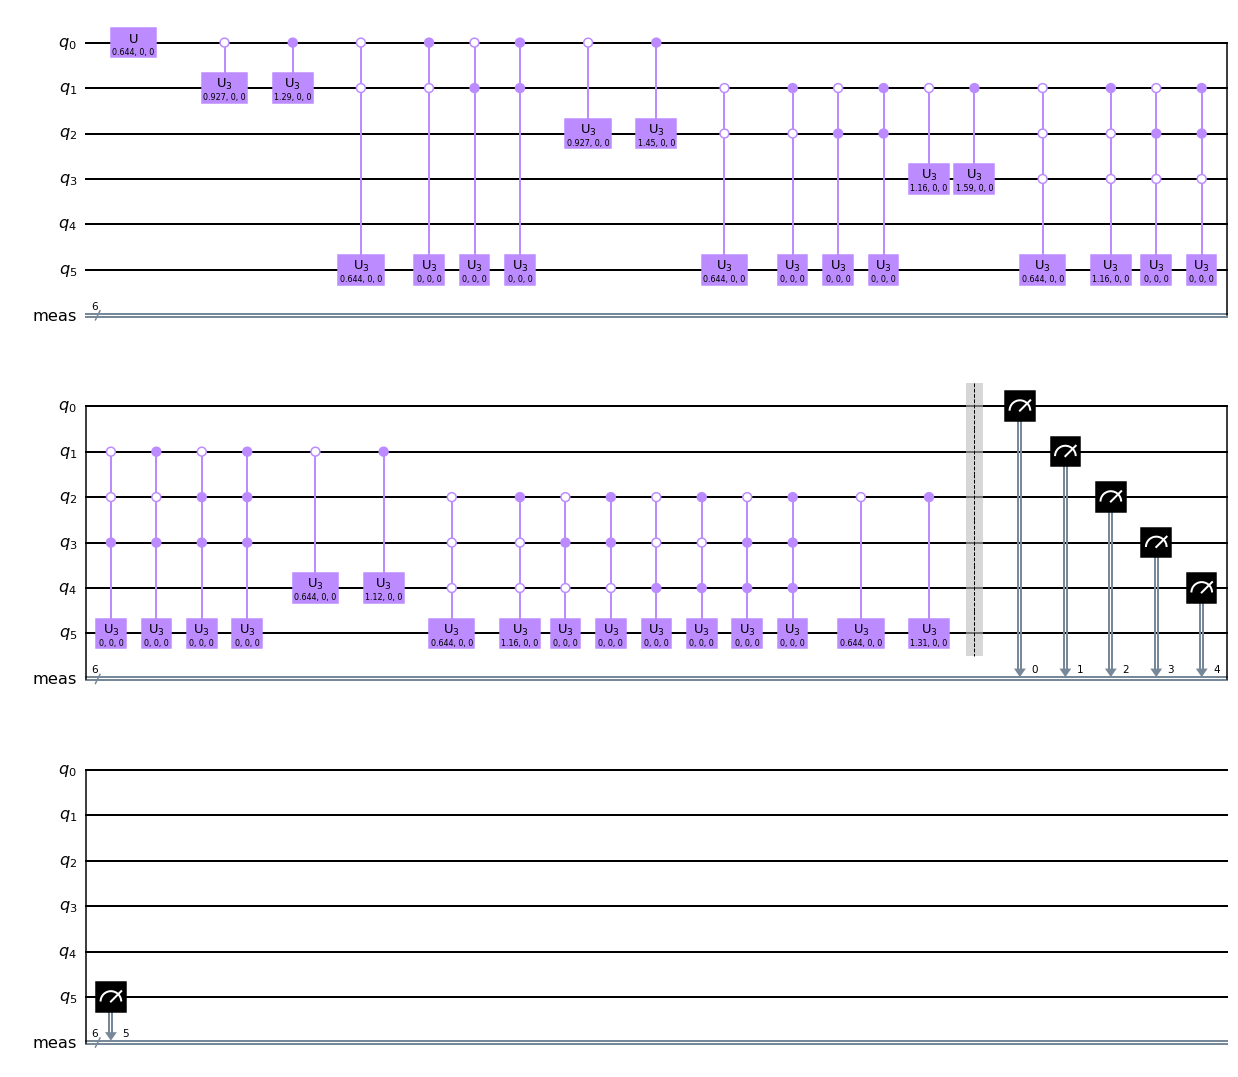

-------------------------------


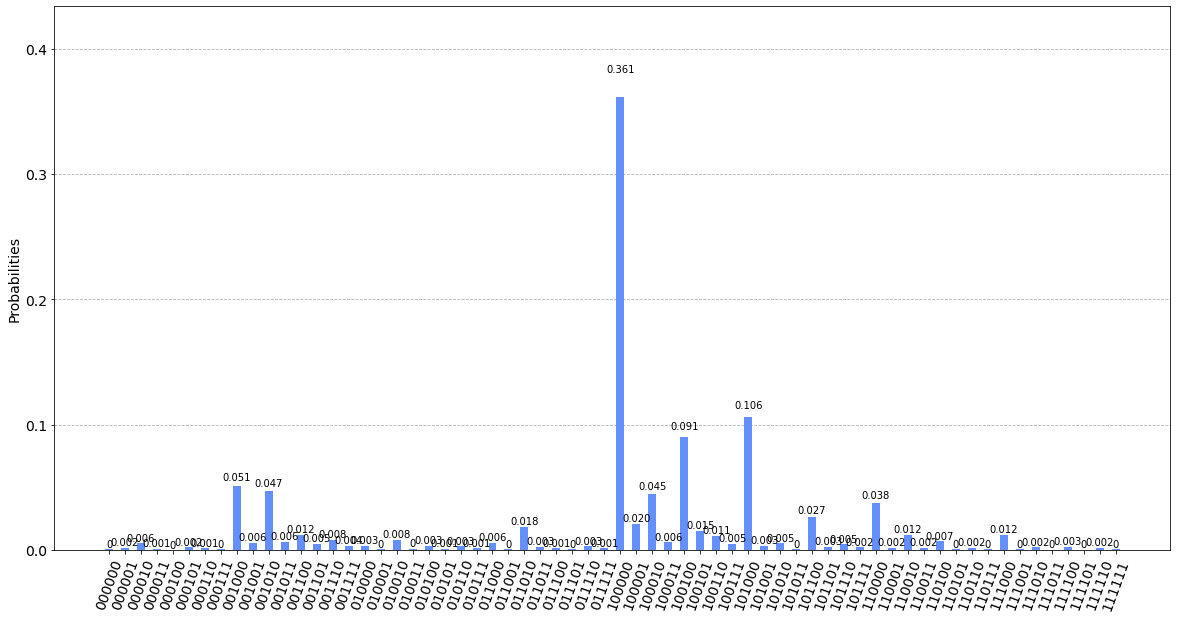

In [ ]:
# execute function to build a qiskit gate with the risk model
#rm, mat = brm(nodes, edges, probsNodes, probsEdges, model2gate=False) 

rm.measure_all()
display(rm.draw(output='mpl'))
print("-------------------------------")

backend = Aer.get_backend('qasm_simulator')
job = execute(rm, backend,shots=100000)
result=job.result()
counts=job.result().get_counts()
plot_histogram(counts,figsize=(20,10))

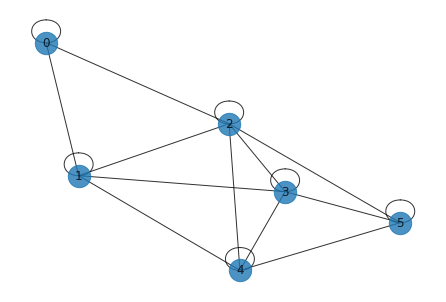

In [ ]:
## building the graph from adjacency matrix for visual representation
G = nx.Graph()
G = nx.from_numpy_array(mat)
nx.draw(G, with_labels=True, alpha=0.8, node_size=500)

In [ ]:
## use Oracle to build QAE and evaluate probabaility for state 'STATELIST'
name = "test"
STATELIST = ["111111"] # we search for the joint probability where all 6 parameters are triggered
Nshots = 100000 # number of shots
QAEqubits = 8 # QAE bit precision --> 8 bit strings at the end of the measurement to differentiate 2^8 = 265 bins


#rm = BRMlist(RIlist,TPlist,model2gate=True)
rm, mat = brm(nodes, edges, probsNodes, probsEdges, model2gate=True) 
ora = brmoracle("ora",rm,len(nodes),0,STATELIST)
QAE=qae(QAEqubits,len(nodes),len(nodes),rm,ora)

NOTE: Item 2 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
NOTE: Item 3 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
NOTE: Item 4 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
NOTE: Item 5 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:


In [ ]:
## execution with local quantum simulator (qasm simulator)

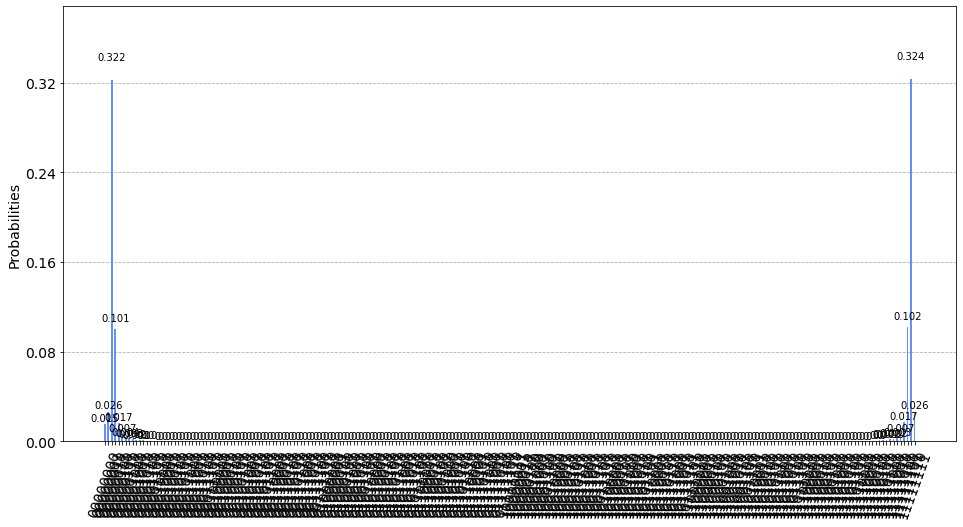

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(QAE, backend,shots=Nshots)
result=job.result()
counts=job.result().get_counts()
plot_histogram(counts,figsize=(16,8))

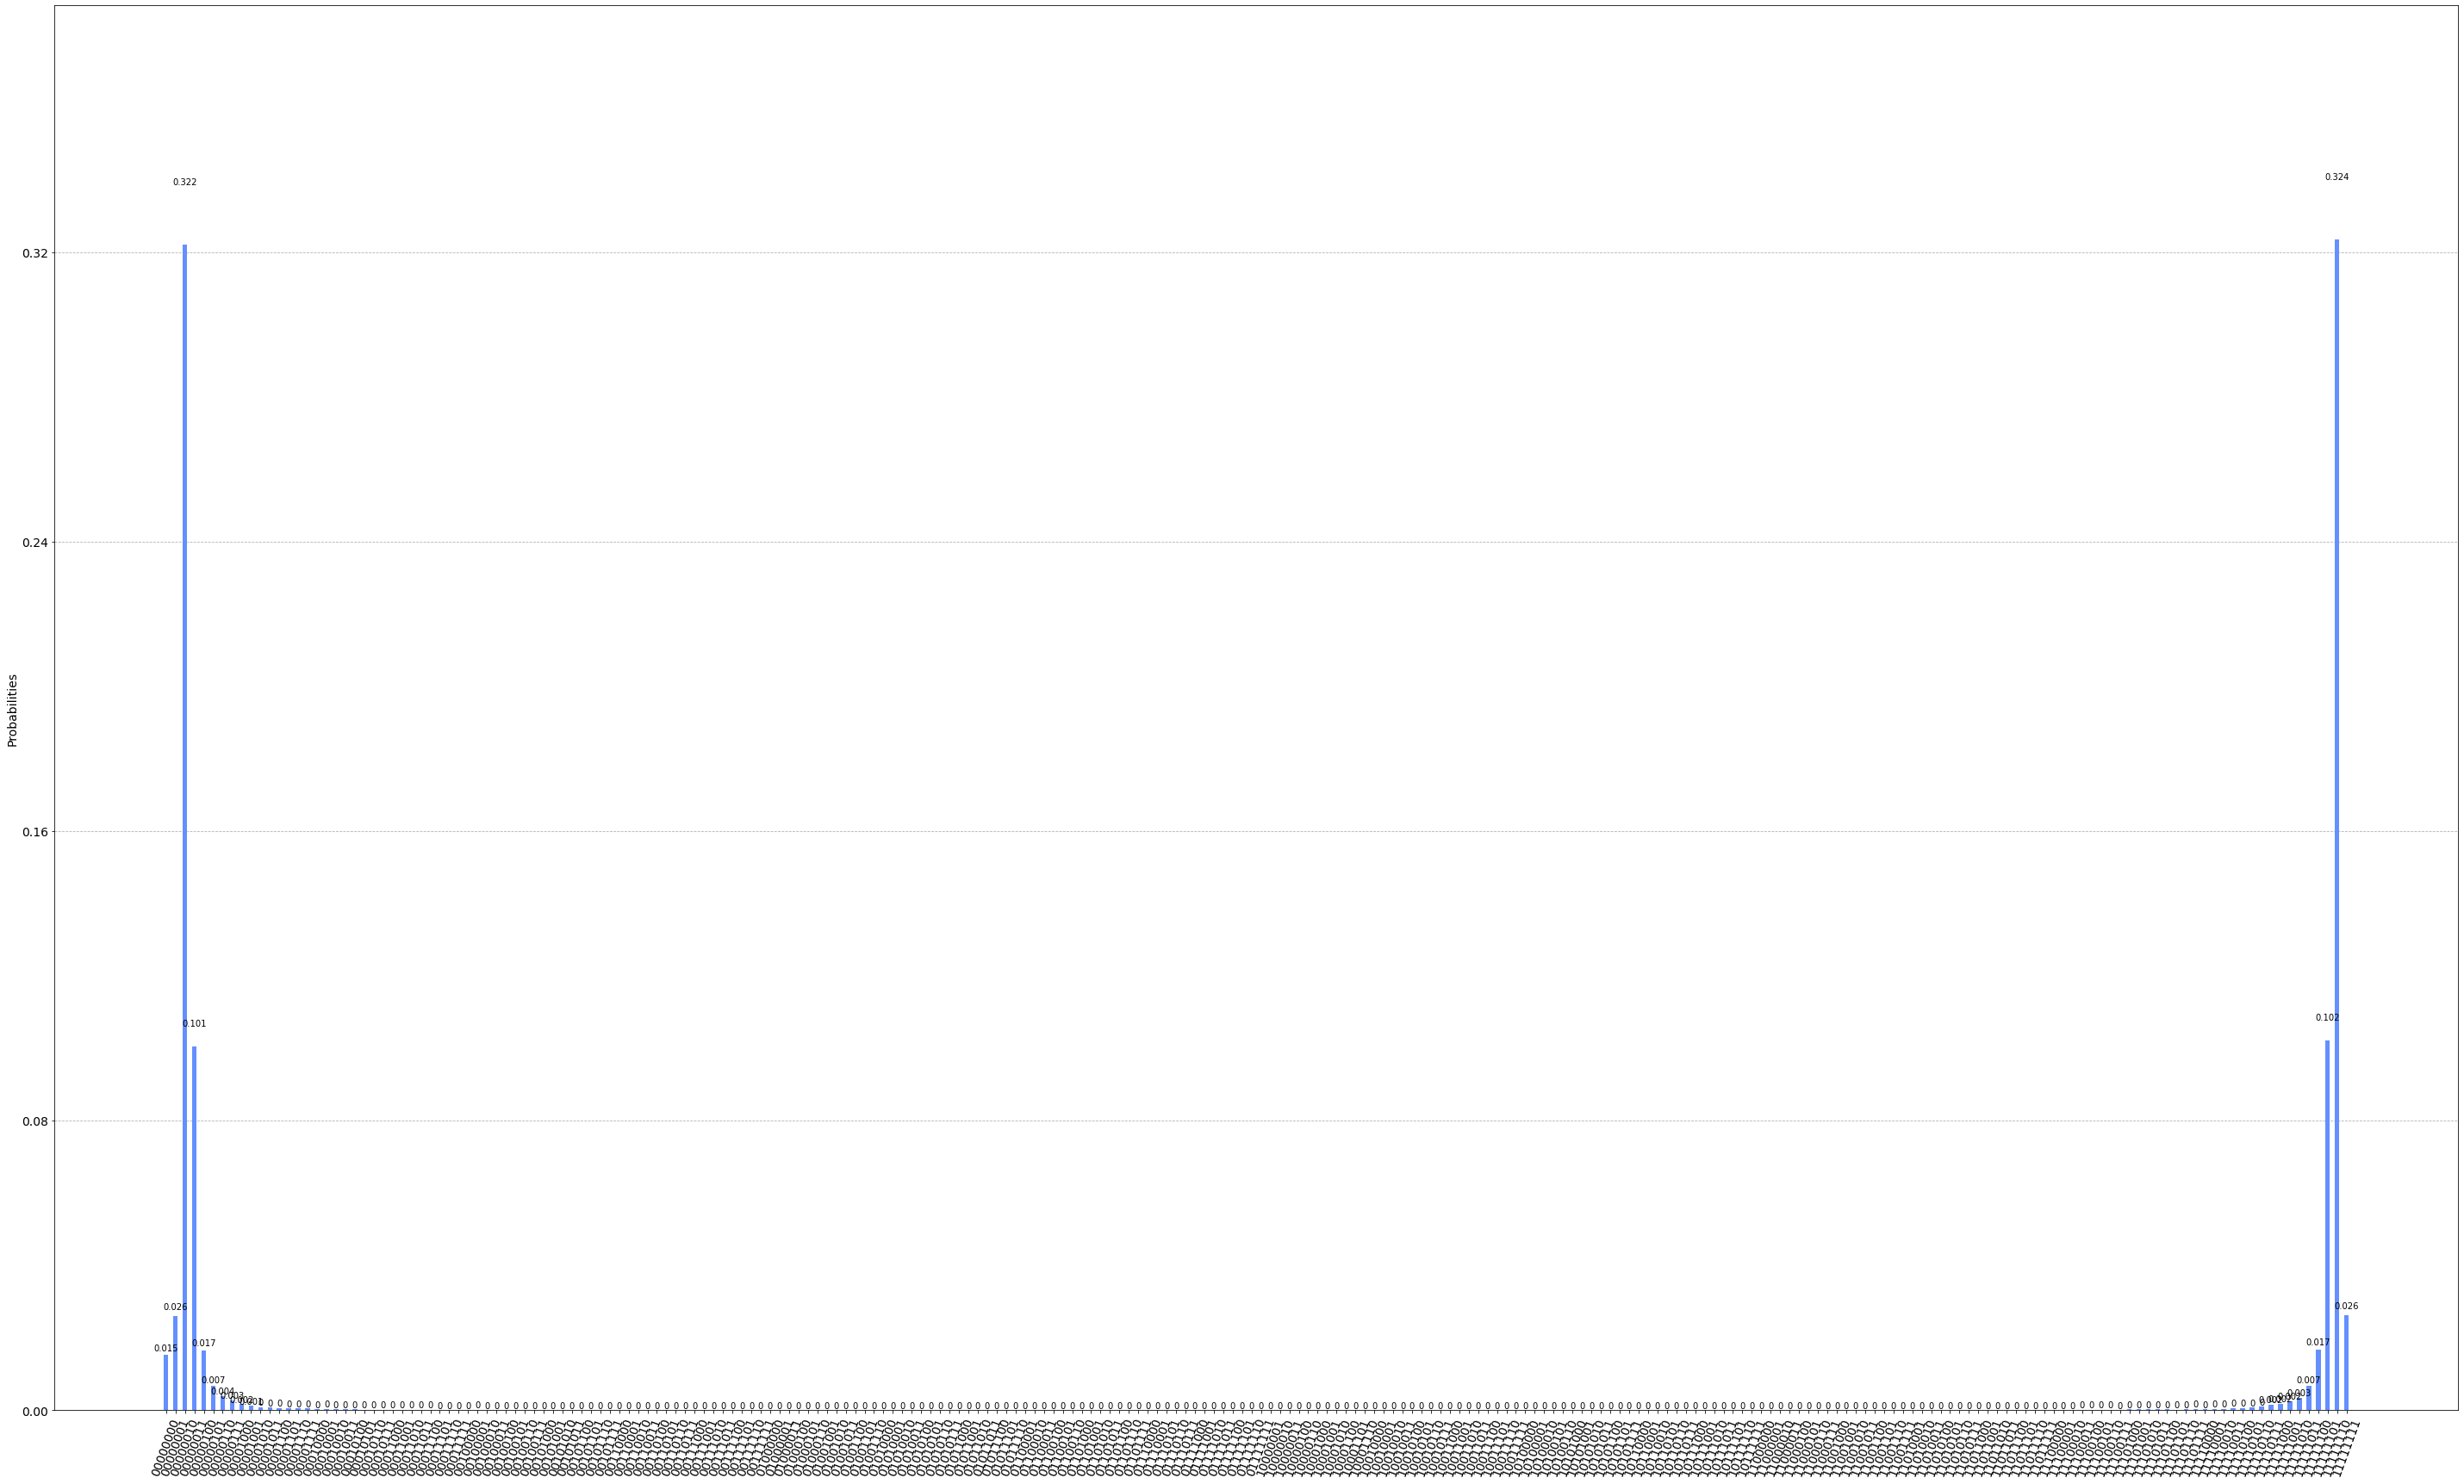

In [ ]:
plot_histogram(counts,figsize=(50,30))

In [ ]:
# post processing: we see two different peaks from the QAE

showQAEoutput(counts,STATELIST,QAEqubits)

Bin with the highest probability:  11111110
Number of Bin with the highest probability:  254
The probability of the tail event  ['111111']  is:  0.0006022718974138055


0.0006022718974138055

## Even Larger Example

In [8]:
## larger example

nodes=['0','1','2','3','4','5','6','7'] # risk items defition
edges=[('0','1'),('0','2'),('1','2'),('1','3'),('1','4'),('2','3'),('2','4'),('2','5'),('3','4'),('3','5'),('4','5'),('5','6'),('5','7'),('6','7')] # risk items correlations

probsNodes={'0':0.1, '1':0.2, '2':0.1, '3':0.2, '4':0.1, '5':0.1, '6':0.1, '7':0.1} # intrinsic probs
probsEdges={('0','1'):0.2, ('0','2'):0.3, ('1','2'):0.2, ('1','3'):0.3, ('1','4'):0.2, ('2','3'):0.3, ('2','4'):0.2, 
            ('2','5'):0.3, ('3','4'):0.2, ('3','5'):0.5, ('4','5'):0.4, ('5','6'):0.3, ('5','7'):0.2, ('6','7'):0.4} # transition probs

print("Number of risk items = ", len(nodes))
print("Number of correlations = ", len(edges))

Number of risk items =  8
Number of correlations =  14


NOTE: Item 2 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
NOTE: Item 3 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
NOTE: Item 4 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
NOTE: Item 5 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
NOTE: Item 7 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:


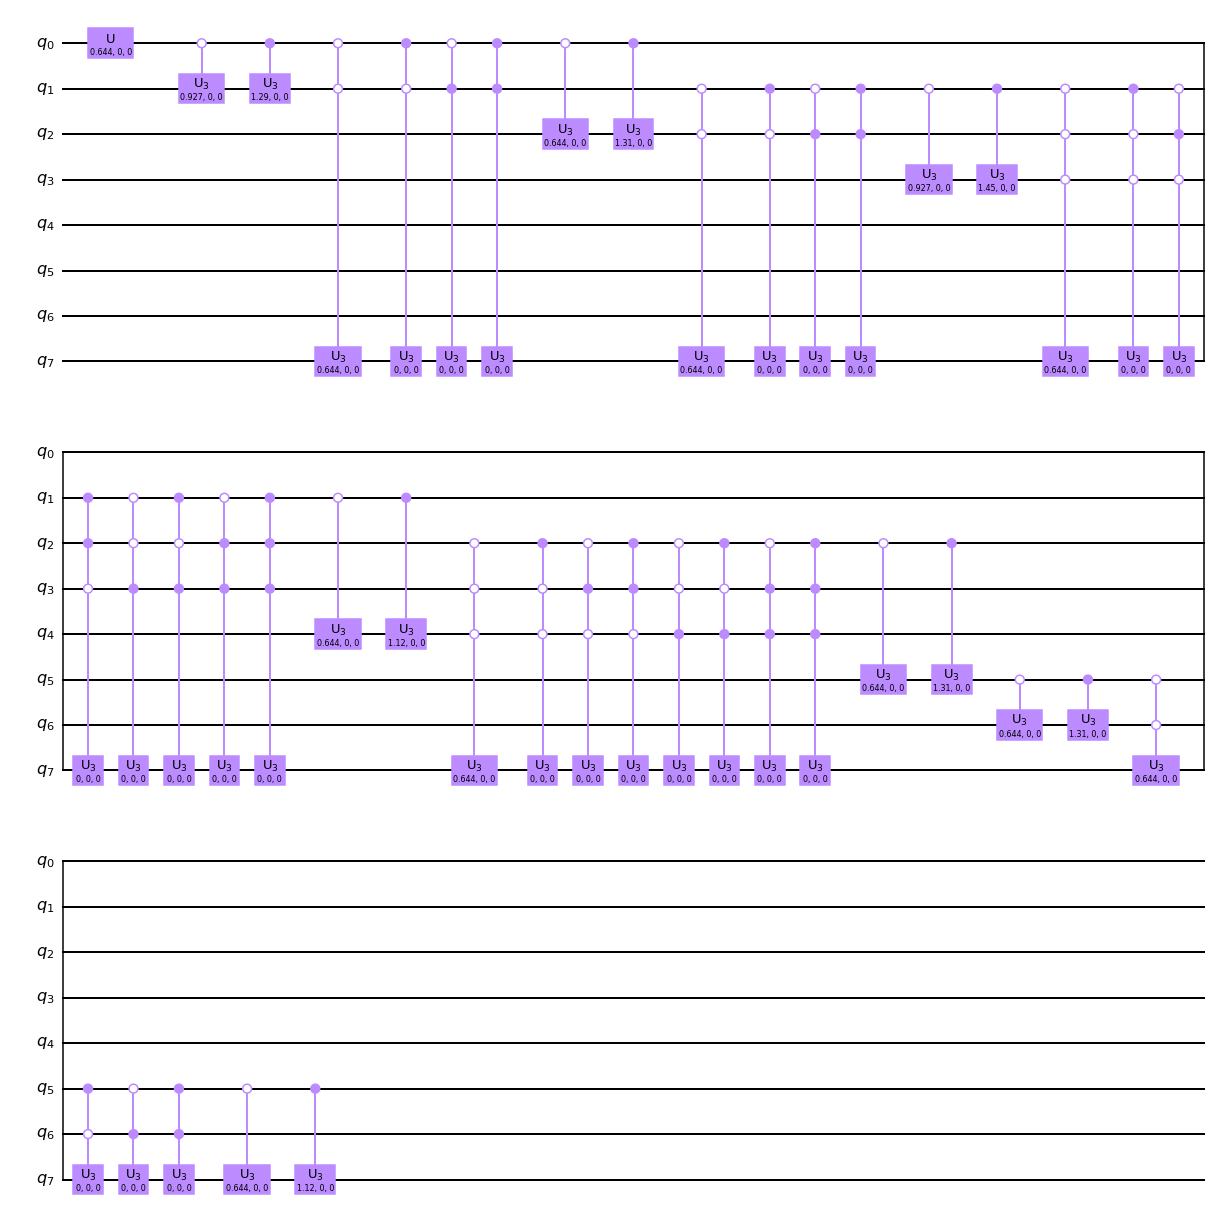

In [9]:
rm, mat = brm(nodes, edges, probsNodes, probsEdges, model2gate=False) 
rm.draw(output='mpl')

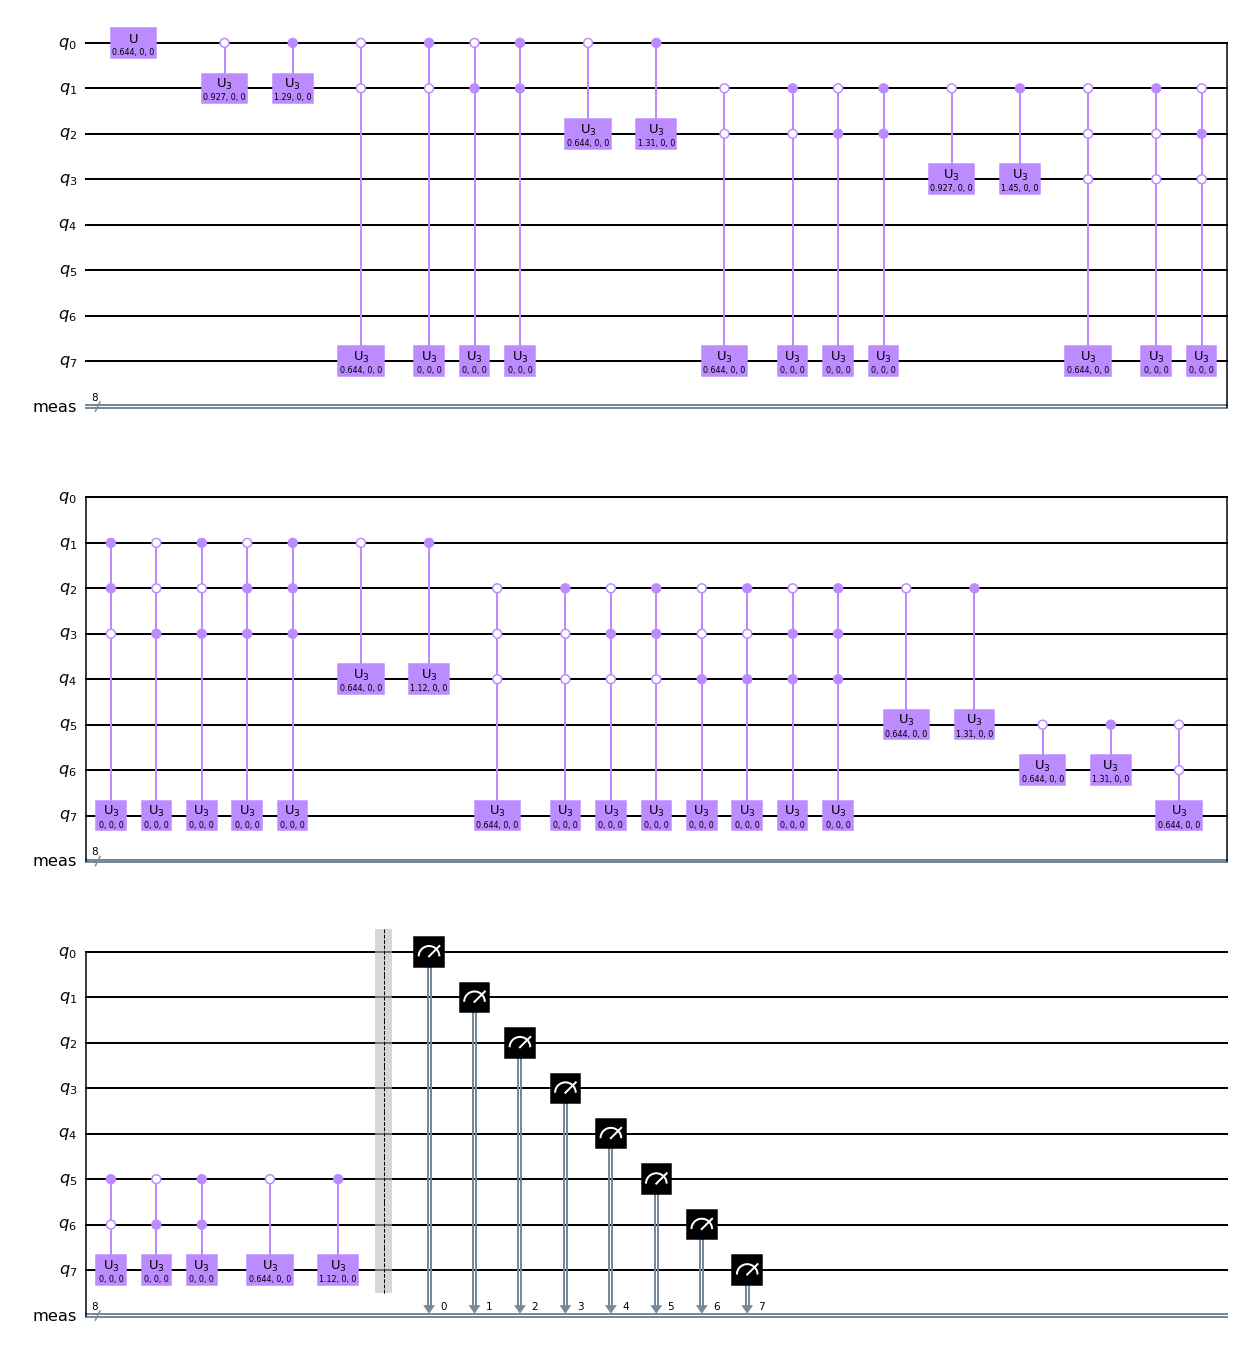

-------------------------------


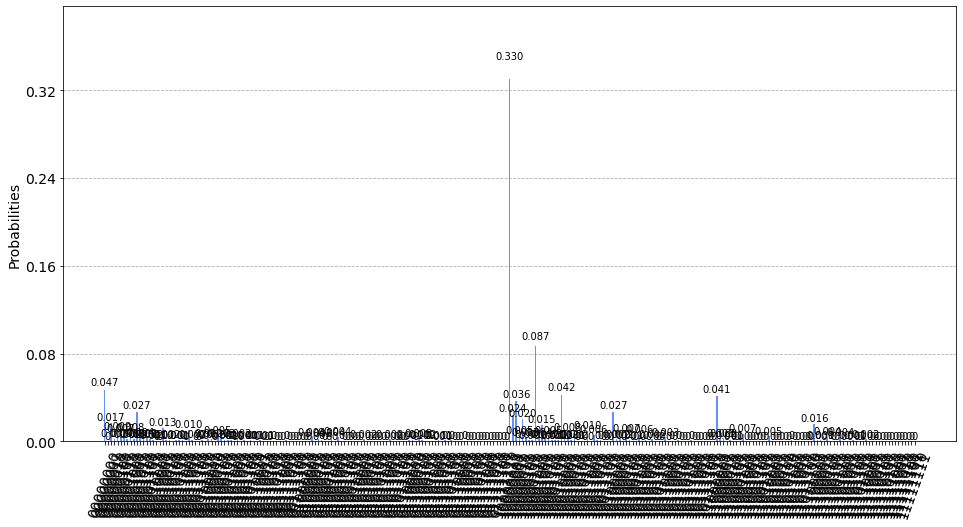

In [10]:
rm.measure_all()
display(rm.draw(output='mpl'))
print("-------------------------------")

backend = Aer.get_backend('qasm_simulator')
job = execute(rm, backend,shots=100000)
result=job.result()
counts=job.result().get_counts()
plot_histogram(counts,figsize=(16,8))

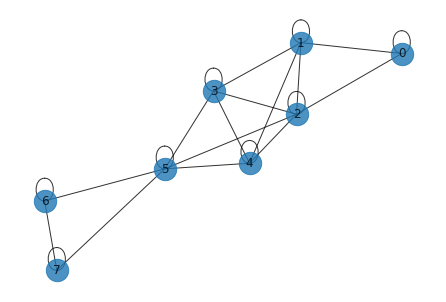

In [11]:
## building the graph from adjacency matrix for visual representation
G = nx.Graph()
G = nx.from_numpy_array(mat)
nx.draw(G, with_labels=True, alpha=0.8, node_size=500)

In [ ]:
## use Oracle to build QAE and evaluate probabaility for state 'STATELIST'
name = "test"
STATELIST = ["11111111"] # we search for the joint probability where all 8 parameters are triggered
Nshots = 100000 # number of shots
QAEqubits = 12 # QAE bit precision --> 8 bit strings at the end of the measurement to differentiate 2^8 = 265 bins


#rm = BRMlist(RIlist,TPlist,model2gate=True)
rm, mat = brm(nodes, edges, probsNodes, probsEdges, model2gate=True) 
ora = brmoracle("ora",rm,len(nodes),0,STATELIST)
QAE=qae(QAEqubits,len(nodes),len(nodes),rm,ora)

NOTE: Item 2 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
NOTE: Item 3 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
NOTE: Item 4 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
NOTE: Item 5 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
ITEM:
NOTE: Item 7 is triggered by more than one other RI!
ITEM:
ITEM:
ITEM:


In [ ]:
## execution with local quantum simulator (qasm simulator)
backend = Aer.get_backend('qasm_simulator')
job = execute(QAE, backend,shots=Nshots)
result=job.result()
counts=job.result().get_counts()
plot_histogram(counts,figsize=(70,30))

NameError: ignored

In [ ]:
# post processing: we see two different peaks from the QAE

showQAEoutput(counts,STATELIST,QAEqubits)